In [4]:
!pip install gensim


In [5]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [10]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798075318336487), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [11]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group 
twitch = model['twitch'] 
print(model.most_similar('twitch'))

[('twitching', 0.5640504956245422), ('muscles', 0.5623922944068909), ('flexing', 0.5436401963233948), ('twitches', 0.520160973072052), ('fibers', 0.5190841555595398), ('droopy', 0.5093850493431091), ('reflexes', 0.5052903890609741), ('quickening', 0.5043982863426208), ('sizzle', 0.5019487738609314), ('atrophy', 0.4994564652442932)]


In [12]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.6407975554466248), ('le', 0.6403627991676331), ('strasbourg', 0.6346525549888611)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403284788131714)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512701153755188), ('pets', 0.7392118573188782), ('cows', 0.6835323572158813), ('pet', 0.679297685623169), ('horses', 0.6774963736534119), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [13]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736048221588), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [14]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document 
food=model["grill"]-model["boil"]  
print(model.most_similar(food))  
print(model.most_similar(-food))
model.most_similar(model["chef"]+food)


[('grill', 0.4611794948577881), ('grills', 0.44879186153411865), ('gehry', 0.4246033728122711), ('tavern', 0.4240002930164337), ('atsumi', 0.40471312403678894), ('jeweler', 0.39904525876045227), ('steakhouse', 0.390918105840683), ('norick', 0.38669446110725403), ('doorman', 0.3771948218345642), ('autosome', 0.37660565972328186)]
[('boil', 0.5803341269493103), ('trickle', 0.486897736787796), ('evaporating', 0.4505460560321808), ('simmer', 0.4501354396343231), ('evaporate', 0.44684040546417236), ('dwindle', 0.444486528635025), ('saucepan', 0.4429199993610382), ('evaporated', 0.44150349497795105), ('stirring', 0.4362988770008087), ('percolate', 0.42464208602905273)]


[('chef', 0.7721453309059143),
 ('restaurant', 0.6346285343170166),
 ('chefs', 0.5806883573532104),
 ('grill', 0.5649366974830627),
 ('designer', 0.5536412596702576),
 ('restaurateur', 0.5439299941062927),
 ('proprietor', 0.5388099551200867),
 ('bistro', 0.5082547068595886),
 ('decorator', 0.5080331563949585),
 ('eatery', 0.5029796957969666)]

Part 2: Visualization and Embeddings in Space

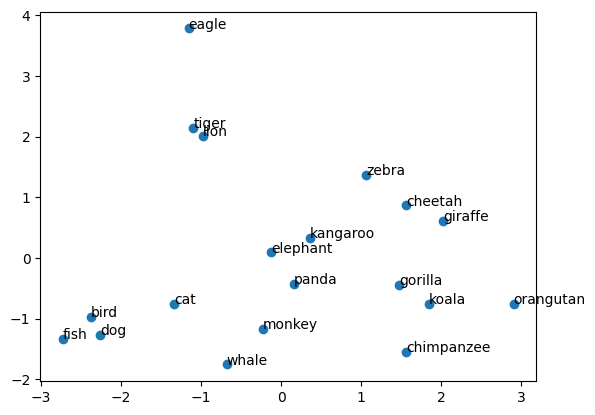

In [15]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

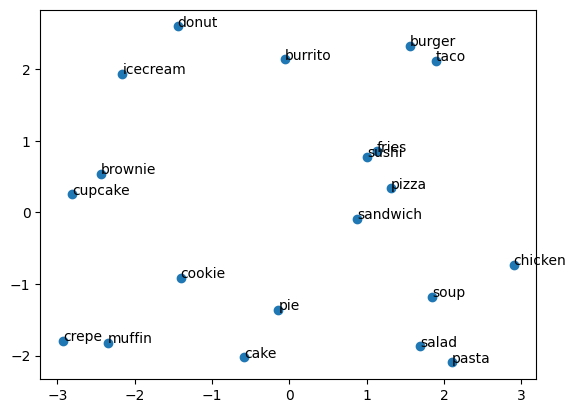

In [9]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=['burger', 'pizza', 'pasta', 'sushi', 'taco', 'burrito', 'salad', 'soup', 'sandwich', 'fries', 'icecream', 'donut', 'cake', 'cupcake', 'cookie', 'brownie', 'pie', 'muffin', 'chicken', 'crepe']

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


In [6]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


Part 3: Embedding reddit posts

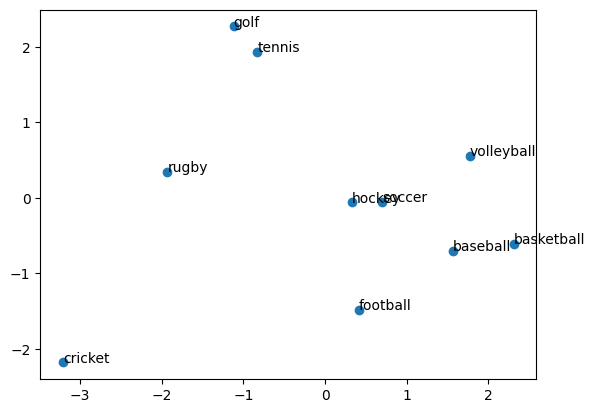

In [16]:
 
words=['football', 'basketball', 'baseball', 'soccer', 'tennis', 'cricket', 'hockey', 'golf', 'rugby', 'volleyball']

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [17]:
import pandas as pd
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [18]:
from sklearn.feature_extraction.text import CountVectorizer
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text  

data['cleaned_text'] = data['text'].apply(clean)

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text']) 

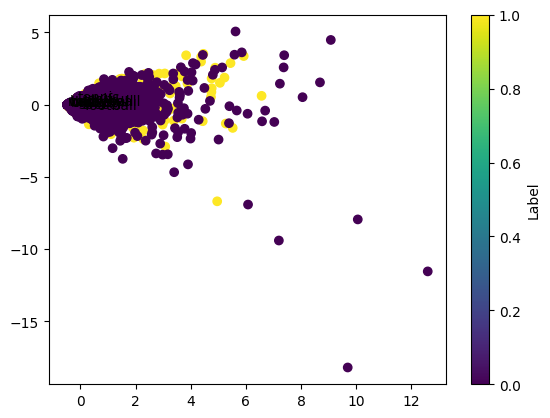

In [26]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

vectorizer = CountVectorizer(min_df=2, max_df=0.8, stop_words='english')

X = vectorizer.fit_transform(data["cleaned_text"])

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1],c=data['label'])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))
plt.colorbar(label='Label')
plt.show()
#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

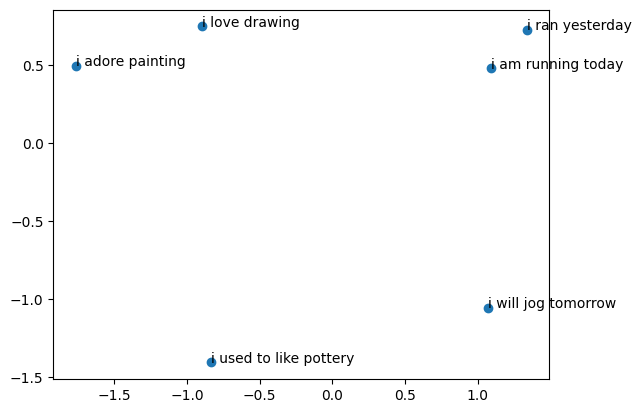

In [20]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\ajmon\miniconda3\envs\is310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ajmon\miniconda3\envs\is310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


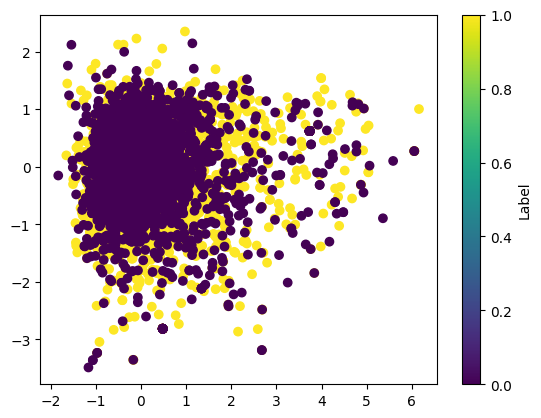

In [29]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation?  
average_embeddings = [avg_embedding(post, model) for post in data['cleaned_text']]

valid_embeddings = [embedding for embedding in average_embeddings if embedding.shape == (100,)]
valid_labels = [label for embedding, label in zip(average_embeddings, data['label']) if embedding.shape == (100,)]

embedding_array = np.array(valid_embeddings)

pca_model = PCA(n_components=2)
reduced_embeddings = pca_model.fit_transform(embedding_array)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=valid_labels) 
plt.colorbar(label='Label') 
plt.show()

Part 4: HuggingFace and BERT

In [21]:
!pip install transformers

In [22]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 23.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.0 MB ? eta -:--:--
    --------------------------------------- 6.0/390.0 MB 30.7 MB/s eta 0:00:13
   - -------------------------------------- 13.6/390.0 MB 31.7 MB/s eta 0:00:12
   -- ------------------------------------- 20.4/390.0 MB 32.3 MB/s eta 0:00:12
   -- ------------------------------------- 29.1/390.0 MB 34.8 MB/s eta 0:00:11
   --- ------------------------------------ 37.5/390.0 MB 36.1 MB/s eta 0:00:10
   ---- ----------------------------------- 45.1/390.0 MB 36.8 MB/s eta 0:00:10
   ----- ---------------------------------- 50.3/390.0 MB 34.5 MB/s eta 0:00:10
   ----- ---------------------------------- 53.2/390.0 MB 32.0 MB/s eta 0:00:11
   ----- ---------------------------------- 54.5/390.0 MB 28.9 MB/s eta 0:00:12
   ----- ---------------------------------- 55.8/390.0 MB 26.7 M

In [23]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


tf_model.h5:   0%|          | 0.00/540M [00:00<?, ?B/s]

c:\Users\ajmon\miniconda3\envs\is310\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ajmon\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
All model checkpoint layers were used when initializing TFRobertaForSequenceClassifi

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [24]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9911694526672363}]

In [32]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label 
# Used Copilot to help with this part
def sentiment(text):
    if not text:  
        return None
    try:
        truncated_text = text[:128]
        return pipe(truncated_text)[0]['label']
    except Exception as e:
        print(f"Error processing text: {text[:30]}... - {e}")
        return None 
    
#Computer could not handle the whole data set, so doing the first 500 
data1 = data.head(500).copy()

# Apply the function to classify the sentiment of each post
data1.loc[:, 'sentiment'] = data1['cleaned_text'].apply(sentiment)

# Drop any None values resulting from errors
data1 = data1.dropna(subset=['sentiment'])

most_common_sentiment = data1['sentiment'].value_counts().idxmax()
print(f"Most common sentiment label: {most_common_sentiment}")

Most common sentiment label: NEU


In [33]:
#look at ten sample posts and labels; do you agree with all of them?  
data = pd.DataFrame({
    'text': [
       "I love this class!",
        "This is the worst experience ever.",
        "I am okay with the results.",
        "This is fantastic!",
        "I'm really disappointed with the service.",
        "The weather is beautiful today.",
        "I can't stand the traffic.",
        "This product is okay.",
        "I'm thrilled with my purchase!",
        "This is a terrible movie."
    ]
}) 

# Classify sentiment for each post in the dataset
data['sentiment'] = data['text'].apply(lambda x: pipe(x)[0]['label'])

# Look at ten sample posts and their labels
sample_posts = data.sample(n=10, random_state=1)
print(sample_posts[['text', 'sentiment']])

                                        text sentiment
2                I am okay with the results.       POS
9                  This is a terrible movie.       NEG
6                 I can't stand the traffic.       NEG
4  I'm really disappointed with the service.       NEG
0                         I love this class!       POS
3                         This is fantastic!       POS
1         This is the worst experience ever.       NEG
7                      This product is okay.       POS
8             I'm thrilled with my purchase!       POS
5            The weather is beautiful today.       POS


**Looking over them I agree with all of the sentiments.**

In [ ]:
#is the UIUC or Michigan subreddit more negative?

In [ ]:
#Used Copilot to help with this part
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample to have an equal number of samples (take a smaller portion for faster processing)
mich = mich.sample(n=1000)  # Sample 1000 entries from Michigan subreddit
uiuc = uiuc.sample(n=1000)   # Sample 1000 entries from UIUC subreddit

# Assign labels based on the origin subreddit of the comment
uiuc['label'] = 1  # Label for UIUC
mich['label'] = 0  # Label for Michigan

# Combine datasets
data = pd.concat([uiuc, mich], ignore_index=True)

# Initialize the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Function to safely classify sentiment
def classify_sentiment(text):
    if pd.isnull(text) or text.strip() == "":
        return "NEUTRAL"  # or any label you'd like to use for empty texts
    try:
        truncated_text = text[:128]  # Truncate text to the first 128 characters
        return pipe(truncated_text)[0]['label']
    except IndexError:
        return "ERROR"  # Handle any unexpected error cases

# Sample a smaller portion of the combined data (e.g., 200 posts)
sample_data = data.sample(n=1000, random_state=1)  # Set random_state for reproducibility

# Classify sentiment for the sampled posts in the dataset
sample_data['sentiment'] = sample_data['text'].apply(classify_sentiment)

# Count negative sentiments for each subreddit
negative_counts = sample_data[sample_data['sentiment'] == 'NEG'].groupby('label').size()

# Display results
uiuc_negative_count = negative_counts.get(1, 0)  # Count of negative posts in UIUC
mich_negative_count = negative_counts.get(0, 0)  # Count of negative posts in Michigan

# Determine which subreddit is more negative
if uiuc_negative_count > mich_negative_count:
    more_negative = "UIUC"
    count = uiuc_negative_count
elif mich_negative_count > uiuc_negative_count:
    more_negative = "Michigan"
    count = mich_negative_count
else:
    more_negative = "Neither"
    count = uiuc_negative_count  # Both counts are equal

# Print the results
print(f"The more negative subreddit is '{more_negative}' with {count} negative posts.")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


The more negative subreddit is 'Michigan' with 127 negative posts.
